In [1]:
from pathlib import Path

In [2]:
# !dir

In [3]:
cd

C:\Users\Dell


In [4]:
!dir class_July\sms+spam+collection\

 Volume in drive C is OS
 Volume Serial Number is 38C8-8BCD

 Directory of C:\Users\Dell\class_July\sms+spam+collection

08/21/2024  12:19 PM    <DIR>          .
08/23/2024  09:07 PM    <DIR>          ..
08/21/2024  12:12 PM             5,868 readme
08/21/2024  12:12 PM           477,907 SMSSpamCollection
               2 File(s)        483,775 bytes
               2 Dir(s)  293,752,897,536 bytes free


In [5]:
!type class_July\sms+spam+collection\readme

SMS Spam Collection v.1
-------------------------

1. DESCRIPTION
--------------

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

1.1. Compilation
----------------

This corpus has been collected from free or free for research sources at the Web:

- A collection of between 425 SMS spam messages extracted manually from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Theses available 

In [6]:
dir_path = Path('class_July/sms+spam+collection')

file_path = dir_path / 'SMSSpamCollection'

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(file_path, sep='\t', header=None)
df.columns = ["class", "message"]

In [9]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [10]:
print(*(df['class'].unique()))

ham spam


In [11]:
df['class'].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

By dividing df['class'].value_counts() by df.shape[0], you are normalizing the counts by the total number of rows.

This gives the proportion of each class relative to the entire DataFrame, effectively showing the distribution of classes.

In [12]:
(df['class'].value_counts()) / df.shape[0]

class
ham     0.865937
spam    0.134063
Name: count, dtype: float64

* SMOTE (Synthetic Minority Over-sampling Technique)

##### EDA -> do it by yourself

In [13]:
df.head(3)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [14]:
df['message'] = df['message'].apply(lambda m: m.strip().lower())

In [15]:
df.head(2)

,class,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...


we cannot give message to machine learning model so convert,

text -> 2D numerical data

## NLP

        Stop Words Remove

        Stemming

        Vectorization - TF/IDF

* Stop Words

        helping verbs -> is, are, was, were, .....

        common words -> the, it, they, you, .....

In [16]:
import matplotlib.pyplot as plt

In [17]:
import nltk

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

In [20]:
stop_words = stopwords.words('english')

In [21]:
def get_words(df):
    words = []
    for msg in df['message'].values:
        words.extend(msg.split()) # "["hello", "world", "this", "is", "awesome"] 
    return words

In [22]:
ix = df.groupby('class').groups['ham']
ham_df = df.loc[ix]
ix = df.groupby('class').groups['spam']
spam_df = df.loc[ix]

In [23]:
ham_df.head(2)

,class,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...


In [24]:
spam_df.head(2)

,class,message
2,spam,free entry in 2 a wkly comp to win fa cup fina...
5,spam,freemsg hey there darling it's been 3 week's n...


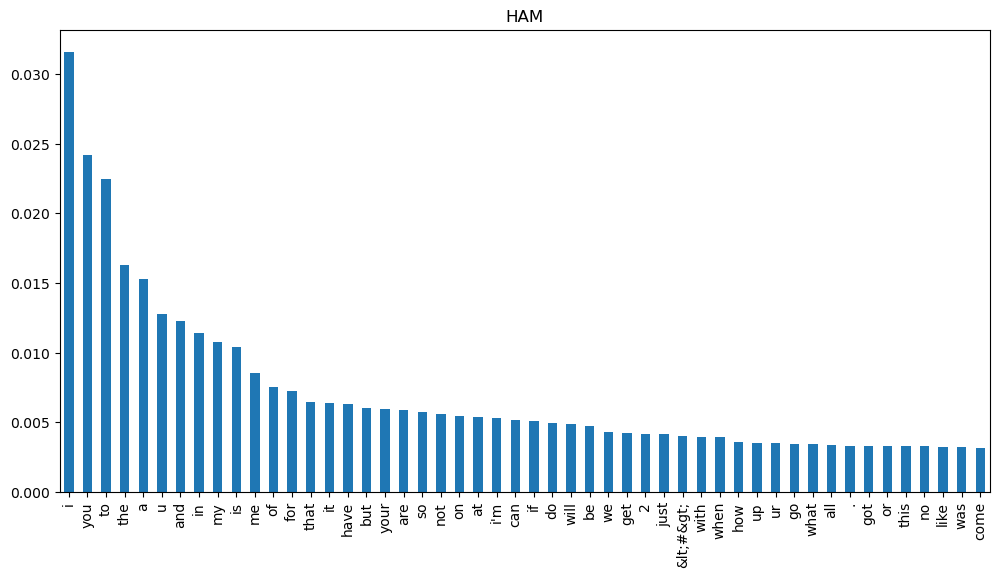

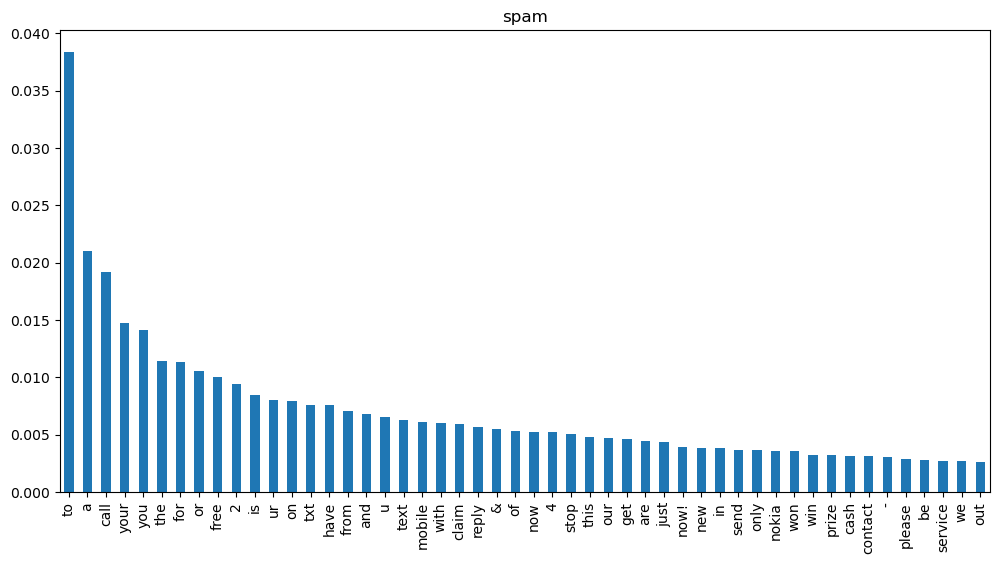

In [25]:
ham_words = get_words(ham_df)
spam_words = get_words(spam_df)

plt.figure(figsize=(12,6))
(pd.Series(ham_words).value_counts().sort_values(ascending=False)[:50]/len(ham_words)).plot(kind='bar')
# we convert it to series so that we can use value_counts()
plt.title('HAM')
plt.show()

plt.figure(figsize=(12,6))
(pd.Series(spam_words).value_counts().sort_values(ascending=False)[:50]/len(spam_words)).plot(kind='bar')
# we convert it to series so that we can use value_counts()
plt.title('spam')
plt.show()

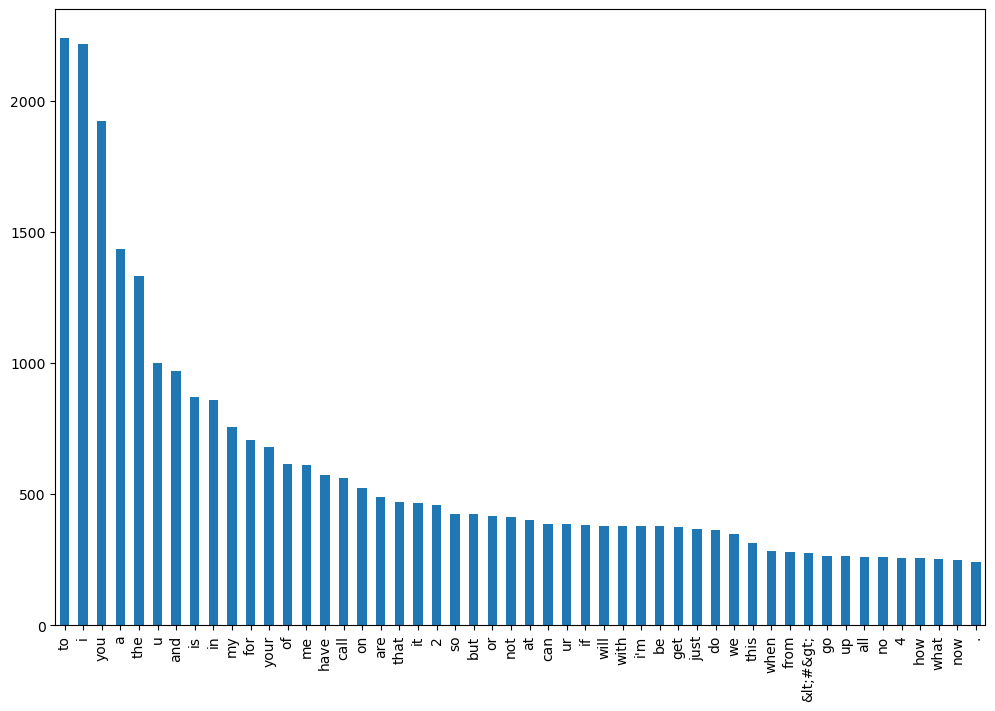

In [26]:
words = []
for msg in df['message'].values:
    words.extend(msg.split()) # ["hello", "world", "this", "is", "awesome"]

plt.figure(figsize=(12,8))
pd.Series(words).value_counts().sort_values(ascending=False)[:50].plot(kind='bar')
# we convert it to series so that we can use value_counts()
plt.show()

text -> 2D(vector)

    each column represents a word

In [27]:
custom_stopwords = [
    "to", "i", "you", "a", "the", "u", "and", "is", "in", "my", "for",
]  # get through EDA

In [28]:
stop_words.extend(custom_stopwords)

In [29]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
def remove_stopwords(message):
    global stop_words
    result = []
    for word in message.split():
        if word.lower().strip() not in stop_words:
            result.append(word)
    return " ".join(result)

In [31]:
stop_words.extend(['good', 'everyone', "dosen't"])

In [32]:
m = "hello this is awesome I am good you are good everyone is good it doesn't seems right"

In [33]:
remove_stopwords(m)

'hello awesome seems right'

step 1> stop word removal

step 2> stemming 

    play plays playing played -> can be converted to play

    word -> s, ing, ed       --> play

    play is root word and finding root word from different similar words is called stemming

    stemming -> Rule Based approach to convert a word into its root word without considering the context or grammer

    Lemmatization -> it converts a word into it's root word but it always returns a english word also it contains linguastic rules to stem the word

was   ->   be

better   ->   good

flew    ->    fly

we do not directly remove words , we remove them by using their frequency
 frequency for ham = words occuring in ham/total occurence of that word in ham + spam

## NLP Expert

TF/IDF

    Vector convert

KMeans

In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [35]:
from nltk.stem import LancasterStemmer, SnowballStemmer, PorterStemmer, WordNetLemmatizer

In [36]:
Stemmer = PorterStemmer()

In [37]:
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
           'died', 'agreed', 'owned', 'humbled', 'sized', 'meeting',
           'plotted', 'traditional']

In [38]:
for word in plurals:
    print(Stemmer.stem(word), end = " ")

caress fli die mule deni die agre own humbl size meet plot tradit 

In [39]:
# snowball stemmer supports different languages and we can also pass custom tools to it
for word in plurals:
    print(SnowballStemmer('english').stem(word), end=" ")

caress fli die mule deni die agre own humbl size meet plot tradit 

In [40]:
for word in plurals:
    print(LancasterStemmer().stem(word), end = " ")

caress fli die mul deny died agree own humbl siz meet plot tradit 

In [41]:
# vecctorization
from sklearn.feature_extraction.text import CountVectorizer

term frequency = number of times a word has repeated

In [42]:
documents = [
    "sachin good cricket",
    "dhoni good cricket",
    "virat face cricket right now"
]

In [43]:
vector = CountVectorizer()

In [44]:
vector.fit(documents)

CountVectorizer()

In [45]:
vector.vocabulary_

{'sachin': 6,
 'good': 3,
 'cricket': 0,
 'dhoni': 1,
 'virat': 7,
 'face': 2,
 'right': 5,
 'now': 4}

In [46]:
# cricket dhoni face good now right sachin virat
# if 10,000 unique words then 10,000 columns(features)

In [47]:
tr = vector.transform(documents)

In [48]:
tr

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [49]:
documents

['sachin good cricket', 'dhoni good cricket', 'virat face cricket right now']

In [50]:
tr.toarray()

array([[1, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 1]], dtype=int64)

In [51]:
test = [
    "sachin is sachin virat is virat and dhoni is dhoni there is no comparison",
    "it's a new document which does not get any output",
    "virat virat virat cricket cricket"
]

In [52]:
tr = vector.transform(test).toarray()
tr

array([[0, 2, 0, 0, 0, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 3]], dtype=int64)

In [53]:
# unigram model

In [54]:
corpus = [
    "sachin is a good cricketer sachin sachin sachin sachin",
    "virat is a good cricketer"
]

In [55]:
cv = CountVectorizer(ngram_range=(1,3))

In [56]:
tr = cv.fit_transform(corpus).toarray()

In [57]:
print(cv.vocabulary_)

{'sachin': 9, 'is': 6, 'good': 3, 'cricketer': 0, 'sachin is': 10, 'is good': 7, 'good cricketer': 4, 'cricketer sachin': 1, 'sachin sachin': 12, 'sachin is good': 11, 'is good cricketer': 8, 'good cricketer sachin': 5, 'cricketer sachin sachin': 2, 'sachin sachin sachin': 13, 'virat': 14, 'virat is': 15, 'virat is good': 16}


In [58]:
tr

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 2, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]], dtype=int64)

term frequency 

        -> importance of term in given document

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
# input to this will be countvectorizer

In [60]:
tfidf = TfidfTransformer()

In [61]:
output = tfidf.fit_transform(tr)

In [62]:
print(sorted(cv.vocabulary_.items(), key=lambda v:v[1]))

[('cricketer', 0), ('cricketer sachin', 1), ('cricketer sachin sachin', 2), ('good', 3), ('good cricketer', 4), ('good cricketer sachin', 5), ('is', 6), ('is good', 7), ('is good cricketer', 8), ('sachin', 9), ('sachin is', 10), ('sachin is good', 11), ('sachin sachin', 12), ('sachin sachin sachin', 13), ('virat', 14), ('virat is', 15), ('virat is good', 16)]


In [63]:
output.toarray()

array([[0.10486347, 0.14738195, 0.14738195, 0.10486347, 0.10486347,
        0.14738195, 0.10486347, 0.10486347, 0.10486347, 0.73690976,
        0.14738195, 0.14738195, 0.44214586, 0.2947639 , 0.        ,
        0.        , 0.        ],
       [0.2895694 , 0.        , 0.        , 0.2895694 , 0.2895694 ,
        0.        , 0.2895694 , 0.2895694 , 0.2895694 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.40697968,
        0.40697968, 0.40697968]])

## SPAM HAM PROJECT

In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("class_July/sms+spam+collection/SMSSpamCollection", sep="\t",
                 header=None, names=["class", "message"])
df

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Regular Expression

    To detect and replace certain patterns from a text

#### classes

    \d  -> digit class [0-9]
    \D  -> non-digit class
    \w  -> word class [a-fA-F]
    \W  -> non word class
    \s  -> space class [" ", "  ", "\t", "\n"]
    \S  -> non space class (except space remove everything)
    
    . dot means all classes(number, special character, space , etc)

    ? can be or can not be 

In [66]:
import re

In [67]:
text = "hello 12345 jadu %$#@! \t !@#$&^ 1234-4321-1423-1324  0000-1111-562222-5673333"

    *   -> 0 or more repetition
    +   -> 1 or more repetition

In [68]:
re.findall(r"\d+","1  12  123  1231234")

['1', '12', '123', '1231234']

In [69]:
re.findall(r"\d*","1  12  123  1231234")

['1', '', '', '12', '', '', '123', '', '', '1231234', '']

In [70]:
credit_card = re.compile(r"\d\d\d\d-\d\d\d\d-\d\d\d\d-\d\d\d\d")

In [71]:
credit_card.findall(text)

['1234-4321-1423-1324']

In [72]:
credit_card = re.compile(r"\d{4}-\d{4}-\d{4}-\d{4}")
print(credit_card.findall(text))

['1234-4321-1423-1324']


In [73]:
# if the digits are in a range then 
credit_card = re.compile(r"\d{2,8}-\d{2,8}-\d{2,8}-\d{2,8}")
print(credit_card.findall(text))

['1234-4321-1423-1324', '0000-1111-562222-5673333']


In [74]:
print(re.findall(r"\w", text))

['h', 'e', 'l', 'l', 'o', '1', '2', '3', '4', '5', 'j', 'a', 'd', 'u', '1', '2', '3', '4', '4', '3', '2', '1', '1', '4', '2', '3', '1', '3', '2', '4', '0', '0', '0', '0', '1', '1', '1', '1', '5', '6', '2', '2', '2', '2', '5', '6', '7', '3', '3', '3', '3']


In [75]:
print(re.findall(r"\d", text))

['1', '2', '3', '4', '5', '1', '2', '3', '4', '4', '3', '2', '1', '1', '4', '2', '3', '1', '3', '2', '4', '0', '0', '0', '0', '1', '1', '1', '1', '5', '6', '2', '2', '2', '2', '5', '6', '7', '3', '3', '3', '3']


In [76]:
print(re.findall(r"\W", text))

[' ', ' ', ' ', '%', '$', '#', '@', '!', ' ', '\t', ' ', '!', '@', '#', '$', '&', '^', ' ', '-', '-', '-', ' ', ' ', '-', '-', '-']


In [77]:
doc = """
        convert text to lowercase for caseless comparisons
        remove hyper links, punctuations, alphanumeric words
    """

In [78]:
len(re.findall(r"[aeiouAEIOU]",doc))

32

In [79]:
len(re.findall(r"[^aeiouAEIOU]",doc))

93

    [^aeiouAEIOU] -> [aeiouAEIOU] ko chor kr baaki sb return krega isi liye ye ^ use krte hain


    [aeiouAEIOU]   -> aeiouAEIOU in Text
    
    [^aeiouAEIOU]  -> aeiouAEIOU not in text


    . dot means all classes(number, special character, space , etc)

    ? can be or can not be 

In [80]:
re.findall(r"\d\d\d\d?", "12 123 1234 12345")
#  +  -> greedy search(not stops , just searching till getting number)
#  ?  -> to make + or * non greedy (as it gets pattern mentioned it stops the search)

['123', '1234', '1234']

In [81]:
s = "sachin is a good boy"

In [82]:
re.sub("sachin", "dhoni", s)

'dhoni is a good boy'

()  ->  group 

In [83]:
emails = "sachin@gmail.com  rajat@yahoomail.com  sachin@grasssolutions.in"

In [84]:
pat = r"[\w\.]+"

In [85]:
re.findall(pat, "sachin sachin.yadav sachin.yadav.grras sachin")

['sachin', 'sachin.yadav', 'sachin.yadav.grras', 'sachin']

In [86]:
pat = r"([\w\.]+)@([a-zA-Z]+)\.([a-zA-Z]+)"
    #     r"\1"      r"\2"        r"\3"
    #    group 1     group 2     group 3

In [87]:
re.findall(pat, emails)

[('sachin', 'gmail', 'com'),
 ('rajat', 'yahoomail', 'com'),
 ('sachin', 'grasssolutions', 'in')]

In [88]:
re.sub(pat, r"\1", emails)

'sachin  rajat  sachin'

In [89]:
# greedy search
re.findall(r".*n", emails)

['sachin@gmail.com  rajat@yahoomail.com  sachin@grasssolutions.in']

In [90]:
# non greedy search
re.findall(r".*?n", emails)

['sachin', '@gmail.com  rajat@yahoomail.com  sachin', '@grasssolution', 's.in']

    "<.*?>(.*)</.*?>", r"\1"    <h1 href="..">doc</h1>

In [91]:
def clean_text(message):
    """
        convert text to lowercase for caseless comparisons
        remove hyper links, punctuations, alphanumeric words
    """
    # convert string to lowercase
    message = str(message).lower()
    # remove all new-line character "\n"
    message = re.sub(r"\r?\n", " ", message)
    message = re.sub(r"<.*?>(.*)</.*?>", r"1", message) # for html cases 
    message = re.sub(r"<.*?>+", " ", message)
    # remove text present in any kind of brackets
    message = re.sub(r"\[.*?\]", " ", message)
    message = re.sub(r"\(.*?\)", " ", message)
    message = re.sub(r"\{.*?\}", " ", message)
    # remove url/links from texts
    message = re.sub(r"https?://\S+|www\.\S+", " ", message)
    # remove punctuations letters from strings
    message = re.sub(r"[{}]".format(re.escape(string.punctuation)), " ", message)
    # remove all words containing numbers
    message = re.sub(r"\w*\d+\w*", " ", message)
    # remove phone numbers / credit card numbers / etc
    message = re.sub(r"(\d-?)+", " ", message)
    # remove non-english characters from text
    message = re.sub(r"[^a-zA-Z\s]", " ", message)
    # remove all characters having length less than equal 3
    message = re.sub(r"\b\w{0,3}\b", " ", message)
    # merge multiple spaces into one space
    message = re.sub(r"\s+", " ", message)
    return message

In [92]:
def remove_stopwords(message):
    global stop_words
    clean_message = []
    for word in message.split(" "):
        if word.strip() not in stop_words:
            clean_message.append(word)
    return " ".join(clean_message)

In [93]:
from nltk.corpus import stopwords

In [94]:
stop_words = stopwords.words("english")

In [95]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import SnowballStemmer

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
import string
import re

In [99]:
df.head(3)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [100]:
df['message'] = df['message'].apply(clean_text)

In [101]:
df['message'] = df['message'].apply(remove_stopwords)

In [102]:
def find_root_word(message, stemmer=SnowballStemmer('english')):
    root_words = []
    for word in message.split(' '):
        stem_word = stemmer.stem(word)
        root_words.append(stem_word)
    return " ".join(root_words)

In [103]:
df['message'] = df['message'].apply(find_root_word)

In [104]:
df.head(2)

,class,message
0,ham,jurong point crazi avail bugi great world buf...
1,ham,joke


In [105]:
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 2)),
    TfidfTransformer(),
    LogisticRegression(max_iter=10000,n_jobs=-1)
)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['class'])

In [108]:
model = pipeline.fit(X_train,y_train)

In [109]:
# pipeline.steps[0][1].vocabulary_

In [110]:
y_hat = model.predict(X_test)

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.97      1208
        spam       0.93      0.59      0.72       185

    accuracy                           0.94      1393
   macro avg       0.94      0.79      0.84      1393
weighted avg       0.94      0.94      0.93      1393



In [113]:
from sklearn.naive_bayes import MultinomialNB

In [114]:
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 2)),
    TfidfTransformer(),
    MultinomialNB()
)

In [115]:
model = pipeline.fit(X_train, y_train)
y_hat = model.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1208
        spam       1.00      0.62      0.77       185

    accuracy                           0.95      1393
   macro avg       0.97      0.81      0.87      1393
weighted avg       0.95      0.95      0.94      1393



In [116]:
  from sklearn.linear_model import SGDClassifier  

In [117]:
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 2)),
    TfidfTransformer(),
    SGDClassifier()
)

In [118]:
model = pipeline.fit(X_train, y_train)
y_hat = model.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1208
        spam       0.94      0.87      0.90       185

    accuracy                           0.98      1393
   macro avg       0.96      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [119]:
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 2)),
    TfidfTransformer(),
)

In [120]:
pipeline.fit(X_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('tfidftransformer', TfidfTransformer())])

In [121]:
new_messages = [
    "free free free click here to win prize",
    "hey call me back there is some important news to tell you"
]

In [122]:
new_messages = [clean_text(msg) for msg in new_messages]
new_messages

[' free free free click here prize ',
 ' call back there some important news tell ']

In [123]:
new_messages = [ remove_stopwords(msg) for msg in new_messages]
new_messages

[' free free free click prize ', ' call back important news tell ']

In [131]:
new_messages = [find_root_word(msg) for msg in new_messages]
new_messages

[' free free free click prize ', ' call back import news tell ']

In [132]:
model.predict(new_messages)

array(['spam', 'ham'], dtype='<U4')

In [125]:
#  we use count vectorizer to get the frequency
tr_data = pipeline.transform(new_messages).toarray()

In [126]:
tr_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
tr_data.shape

(2, 21448)

In [133]:
# model.predict(tr_data)